In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure

# **Part 2**

In [2]:
train = pd.read_csv("./fashion-mnist_train.csv")
test = pd.read_csv("./fashion-mnist_test.csv")
df=train.append(test)

## Divide Data according to labels

In [3]:
label=[]
for c in range (10):
    classes=df.loc[df['label']==c]
    label.append(classes)
#for example label[1] is for all the samples with label=1

## Select Different N

In [4]:
%%time
train=[]
test=[]
for j in range(3000,6001,500):
    temp1=[]
    temp2=[]
    for i in range(10):
        data=label[i]
        temp1.append(data[:j])
        temp2.append(data[j:])
    train.append(temp1)
    test.append(temp2)
#divide each class into two sets for each N we choose
#for example: train[0] is the training set for N=3000

CPU times: user 4.35 ms, sys: 25.7 ms, total: 30 ms
Wall time: 30.2 ms


In [ ]:
np.arange(3000,6001,500)
#there are 7 N we have chosen

array([3000, 3500, 4000, 4500, 5000, 5500, 6000])

In [7]:
for i in range(7):
    test[i]=pd.concat(test[i])
    train[i]=pd.concat(train[i])

## Use KNN as classifier

In [ ]:
%%time
N=[]
accuracy=[]
for i in range(7):
    y_train = train[i]['label']
    X_train = train[i].loc[:, train[i].columns != 'label']
    
    y_test = test[i]['label']
    X_test = test[i].loc[:, test[i].columns != 'label']

    knn = KNeighborsClassifier(n_neighbors=20)
    knn.fit(X_train,y_train)
    A=knn.score(X_test,y_test)
    N.append(3000+500*i)
    accuracy.append(A)
    print('N=',3000+500*i ,'mean accuracy=', A)

N= 3000 mean accuracy= 0.83355
N= 3500 mean accuracy= 0.8366285714285714
N= 4000 mean accuracy= 0.8391
N= 4500 mean accuracy= 0.84252
N= 5000 mean accuracy= 0.84405
N= 5500 mean accuracy= 0.8440666666666666
N= 6000 mean accuracy= 0.8473
CPU times: user 18min 50s, sys: 1min 56s, total: 20min 46s
Wall time: 4min 19s


## Plot the figure

Text(0, 0.5, 'mean Accuracy')

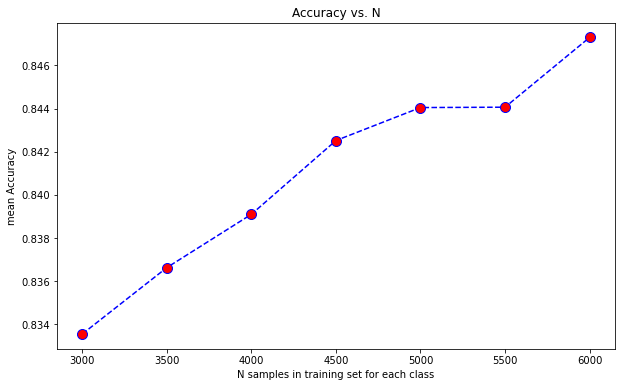

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(N,accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. N')
plt.xlabel('N samples in training set for each class')
plt.ylabel('mean Accuracy')

### Choose N=6000

In [8]:
%%time
i=6
y_train = train[i]['label']
X_train = train[i].loc[:, train[i].columns != 'label']

y_test = test[i]['label']
X_test = test[i].loc[:, test[i].columns != 'label']

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(y_test,pred))
print('N=6000, mean accuracy=',knn.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.91      0.88      0.89      1000
           4       0.79      0.80      0.79      1000
           5       0.99      0.78      0.87      1000
           6       0.64      0.57      0.60      1000
           7       0.85      0.94      0.89      1000
           8       0.97      0.94      0.95      1000
           9       0.87      0.96      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

N=6000, mean accuracy= 0.8473
CPU times: user 2min 44s, sys: 19.3 s, total: 3min 3s
Wall time: 39.6 s


# **Part 3**

In [ ]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

### Use Kfold to select training set

In [ ]:
%%time
kf = KFold(n_splits=7)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn = KNeighborsClassifier(n_neighbors=20)
    knn.fit(X_train,y_train)
    print('mean accuracy=', knn.score(X_test,y_test))
#From the following output, the first fold got the best accuracy

TRAIN: [10000 10001 10002 ... 69997 69998 69999] TEST: [   0    1    2 ... 9997 9998 9999]
mean accuracy= 0.8513
TRAIN: [    0     1     2 ... 69997 69998 69999] TEST: [10000 10001 10002 ... 19997 19998 19999]
mean accuracy= 0.8457
TRAIN: [    0     1     2 ... 69997 69998 69999] TEST: [20000 20001 20002 ... 29997 29998 29999]
mean accuracy= 0.8473
TRAIN: [    0     1     2 ... 69997 69998 69999] TEST: [30000 30001 30002 ... 39997 39998 39999]
mean accuracy= 0.8477
TRAIN: [    0     1     2 ... 69997 69998 69999] TEST: [40000 40001 40002 ... 49997 49998 49999]
mean accuracy= 0.8429
TRAIN: [    0     1     2 ... 69997 69998 69999] TEST: [50000 50001 50002 ... 59997 59998 59999]
mean accuracy= 0.8472
TRAIN: [    0     1     2 ... 59997 59998 59999] TEST: [60000 60001 60002 ... 69997 69998 69999]
mean accuracy= 0.8474
CPU times: user 11min 23s, sys: 1min 26s, total: 12min 49s
Wall time: 2min 42s


### select the index of first fold as training set

In [ ]:
%%time
X_train, X_test = X.iloc[10000:], X.iloc[:10000]
y_train, y_test = y.iloc[10000:], y.iloc[:10000]
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(y_test,pred))
print('mean accuracy=', knn.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1009
           1       0.99      0.96      0.97       972
           2       0.73      0.78      0.76       951
           3       0.91      0.86      0.88      1012
           4       0.77      0.80      0.79       979
           5       1.00      0.80      0.89      1008
           6       0.65      0.56      0.60      1022
           7       0.86      0.96      0.91      1037
           8       0.97      0.94      0.96       974
           9       0.89      0.96      0.93      1036

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

mean accuracy= 0.8513
CPU times: user 2min 47s, sys: 21.6 s, total: 3min 9s
Wall time: 40.9 s
